![res.jpeg](res.jpeg)

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Dataset Info</p>

<a id="1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

The Census Income dataset has 48,842 entries. Each entry contains the following information about an individual:

- **salary (target feature/label):** whether or not an individual makes more than $50,000 annually. (<= 50K, >50K)
- **age:** the age of an individual. (Integer greater than 0)
- **workclass:** a general term to represent the employment status of an individual. (Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked)
- **fnlwgt:** this is the number of people the census believes the entry represents. People with similar demographic characteristics should have similar weights.  There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.(Integer greater than 0)
- **education:** the highest level of education achieved by an individual. (Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.)
- **education-num:** the highest level of education achieved in numerical form. (Integer greater than 0)
- **marital-status:** marital status of an individual. Married-civ-spouse corresponds to a civilian spouse while Married-AF-spouse is a spouse in the Armed Forces. Married-spouse-absent includes married people living apart because either the husband or wife was employed and living at a considerable distance from home (Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse)
- **occupation:** the general type of occupation of an individual. (Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces)
- **relationship:** represents what this individual is relative to others. For example an individual could be a Husband. Each entry only has one relationship attribute. (Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried)
- **race:** Descriptions of an individual’s race. (White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black)
- **sex:** the biological sex of the individual. (Male, female)
- **capital-gain:** capital gains for an individual. (Integer greater than or equal to 0)
- **capital-loss:** capital loss for an individual. (Integer greater than or equal to 0)
- **hours-per-week:** the hours an individual has reported to work per week. (continuous)
- **native-country:** country of origin for an individual (United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline  
# notebook içinde grafik göster demek

plt.rcParams["figure.figsize"]=(10,6) # figure ölçüsünü default olarak belirtiyoruz. Aşağıda değiştirmezsek bu şekilde verir.
sns.set_style("whitegrid")      # arkada beyaz grid göster. Stiller içinden bunu seçtik.
pd.set_option("display.float_format", lambda x: '%.2f'  %x)  # rakamları virgülden/noktadan sonra 2 sayı göster

pd.options.display.max_rows=150  # max görünmesini istediğimiz satır ve sütunları belirtiyoruz. Araya nokta koyup kısaltma.
pd.options.display.max_columns=100

import warnings
warnings.filterwarnings("ignore")
warnings.warn("thisnwill not show")

## Read data from file

In [2]:
df = pd.read_csv("adult_eda.csv")

In [3]:
# eğer data bilgisayarda aynı klasörde değilse ve yerini kısmen biliyorsak, şöyle bulabiliriz:
# df =pd.read_csv("../myNotes/adult_eda.csv")  #Burada klasörü biliyoruz ama C veya D'de olduğunu bilmiyoruz.

## Try to understand what the data looks like? What are types of the features? Are there any missing values? Do I need to eliminate some features? 

In [4]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.00,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.00,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.00,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.00,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.00,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# tablodaki toplam satır ve sütun sayılarını shape ile görebiliriz. shape parantezsiz kullanılıyor.
df.shape

(32561, 15)

In [6]:
# sadece satır sayılarını görmek istersek...
df.shape[0]

32561

In [7]:
# nan değerleri ve dtype'ları kontrol etmek için info'ya bakıyoruz. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education-num   31759 non-null  float64
 5   marital-status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    27493 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital-gain    32561 non-null  int64  
 11  capital-loss    32561 non-null  int64  
 12  hours-per-week  32561 non-null  int64  
 13  native-country  32561 non-null  object 
 14  salary          32561 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 3.7+ MB


In [8]:
# istatistik bilgiler için describe'a bakıyoruz. Transpose (T) şeklinde bakabiliriz..
# describe sayısal değerler içeren sütunları verir. Object olanlar özellikle belirtilmezse burada gösterilmiyor.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.00,38.58,13.64,17.00,28.00,37.00,48.00,90.00
fnlwgt,32561.00,189778.37,105549.98,12285.00,117827.00,178356.00,237051.00,1484705.00
education-num,31759.00,10.08,2.58,1.00,9.00,10.00,12.00,16.00
capital-gain,32561.00,1077.65,7385.29,0.00,0.00,0.00,0.00,99999.00
capital-loss,32561.00,87.30,402.96,0.00,0.00,0.00,0.00,4356.00
hours-per-week,32561.00,40.44,12.35,1.00,40.00,40.00,45.00,99.00


In [9]:
# kolonlara bakabiliriz. parantezsiz yazıyoruz.
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

## Look at the value counts of columns that have object datatype and replace '?' like values with 'Unknown' word.  

In [10]:
# soru işaretli olan değerler yerine unknown koyacağız.
# önce data type'larına bakıyoruz. count verisinden nan değer içerenleri anlayabiliriz.
# Ayırca "?" olacaksa bunu objectler içinde bulabiliriz. Bu yüzden objectleri describe ile detaylı görmek istiyoruz.

df.select_dtypes(include="object").describe()  
# object olanları describe yapınca bu lekilde veriyor. 
# Normalde object vermez. Objecti de sayısal olanlara göre farklı göstergelerle veriyor.

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
count,32561,32561,32561,32561,27493,32561,32561,32561,32561
unique,9,16,7,15,5,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [11]:
# mesela bu objectlerden birinin değerlerine bakalım. 
# value_counts() o sütundaki unique değerlerin sayılarını gösteriyor. Örneğin 1836 tane "?" varmış.
df.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [12]:
df[df.workclass=="Without-pay"]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
1901,65,Without-pay,27012,7th-8th,4.00,Widowed,Farming-fishing,Unmarried,White,Female,0,0,50,United-States,<=50K
9257,19,Without-pay,344858,HS-grad,9.00,Never-married,Farming-fishing,NaN,White,Male,0,0,20,United-States,<=50K
15533,21,Without-pay,232719,HS-grad,9.00,Never-married,Craft-repair,NaN,Black,Male,0,0,40,United-States,<=50K
15695,22,Without-pay,302347,HS-grad,9.00,Never-married,Handlers-cleaners,NaN,White,Male,4416,0,40,United-States,<=50K
16812,46,Without-pay,142210,HS-grad,9.00,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,25,United-States,<=50K
20073,65,Without-pay,172949,HS-grad,9.00,Married-civ-spouse,Transport-moving,Husband,White,Male,2414,0,20,United-States,<=50K
21944,52,Without-pay,198262,HS-grad,9.00,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,30,United-States,<=50K
22215,19,Without-pay,43887,HS-grad,9.00,Never-married,Farming-fishing,NaN,White,Male,0,0,10,United-States,<=50K
24596,62,Without-pay,170114,Assoc-acdm,12.00,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
25500,29,Without-pay,212588,Some-college,10.00,Married-civ-spouse,Farming-fishing,NaN,White,Male,0,0,65,United-States,<=50K


In [13]:
# Başka sütunlarda da "?" olma ihtimaline binaen for döngüsü kuruyoruz ve object_col adlı bir değişkene atıyoruz.
object_col=df.select_dtypes(include='object')  # object olan sütunları al...

for col in object_col:   # bunların içindeki her bir kolona tek tek git...
    print(col)
    print("--"*5)       #listenin aralarına çizgi çekmek için
    print(df[col].value_counts(dropna=False))   # her bir kolondaki unique değerleri göster ve nan olanları da ver.
    print("--"*10)

workclass
----------
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
--------------------
education
----------
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
--------------------
marital-status
----------
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype

In [14]:
# Şu şekilde daha sade yazılabilirdi.
object_col=df.select_dtypes(include="object")
for col in object_col:
    print(f"Unique Values in {col} columns: \n{df[col].value_counts(dropna=False)}")
    print("# "*20)
    print("\n")

Unique Values in workclass columns: 
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
# # # # # # # # # # # # # # # # # # # # 


Unique Values in education columns: 
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
# # # # # # # # # # # # # # # # # # # # 


Unique Values in marital-status columns: 
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    9

In [15]:
# df içinde ilgili sütunda hangi değerlerde soru işareti olduğunu görmek için...
df[df.workclass =="?"]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
27,54,?,180211,Some-college,10.00,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,293936,7th-8th,4.00,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,200681,Some-college,10.00,Never-married,?,NaN,White,Male,0,0,40,United-States,<=50K
77,67,?,212759,10th,6.00,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,?,304873,10th,6.00,Never-married,?,NaN,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,320084,Bachelors,13.00,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32531,30,?,33811,Bachelors,13.00,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,?,287372,Doctorate,NaN,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32541,41,?,202822,HS-grad,9.00,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [16]:
# Başka bir yöntemle "?" olan sütunlara şu şekilde ulaşabiliriz...

df[df.isin(["?"])].any()
# "workclass", "occupation" ve "native-country" içinde "?" olan değerler var.

age               False
workclass          True
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation         True
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country     True
salary            False
dtype: bool

In [17]:
# Hangi sütunda kaçar tane "?" olduğunu da öğrenebiliriz.
df[df.isin(["?"])].count()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

In [18]:
# Soru işaretlerinin yerini tespit ettikten sonra "Unknown" ile değiştirebilriiz.
# her bir sütunda değiştirip yine sütunun kendisine atayabiliriz. Burada str yazmasak da olur.
df.workclass = df.workclass.str.replace("?", "Unknown")

# df.workclass.replace("?", "Unknown", inplace=True) ile de değişkene atamadan değiştirebiliriz.

In [19]:
# Değişikliği kontrol ediyoruz. Unknown değişkeni görünüyor.
df.workclass.value_counts(dropna=False)

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
Unknown              1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [20]:
# değişiklikleri bu şekilde de yapabilirdik.
# df[df.workclass == "?"] = "Unknown"

In [21]:
# df içinde soru işareti olan tüm sütunlarda tek seferde değişiklik yapabilirdik.
df.replace("?", "Unknown", inplace=True)

In [22]:
# mesela native-country'de yaptığımız değişikliği kontrol edelim
df[df.isin(["?"])].count()  # df içinde soru işareti olan sütun var mı?

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

## Do education and education_num columns hold similar information? If so drop the appropriate choice between them.

In [23]:
# Eğitimle ilgili olan sütunları kontrol edip birini düşüreceğiz.
# Önce ilgili sütunları kontrol edelim.
df.education.value_counts(dropna=False)

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [24]:
# İlgili diğer sütunda değişken "-" işareti ile yazıldığı için tırnak içinde ve köseli paranteze almalıyız.
df["education-num"].value_counts(dropna=False)  # bu şekilde seçince df'den sonra nokta gelmez.

9.00     10215
10.00     7098
13.00     5247
14.00     1687
11.00     1343
7.00      1146
12.00     1044
6.00       916
NaN        802
4.00       631
15.00      559
5.00       503
8.00       424
16.00      405
3.00       330
2.00       161
1.00        50
Name: education-num, dtype: int64

In [25]:
# education'a göre gruplayalım.
df.groupby("education")["education-num"].value_counts(dropna=False) 

# Burada ilk yazılan kendisine göre gruplandırılacak sütun
# education-num içinde NaN değerler var. Bunu düşürürsek NaN'lardan kurtulabiliriz.

education     education-num
10th          6.00               916
              NaN                 17
11th          7.00              1146
              NaN                 29
12th          8.00               424
              NaN                  9
1st-4th       2.00               161
              NaN                  7
5th-6th       3.00               330
              NaN                  3
7th-8th       4.00               631
              NaN                 15
9th           5.00               503
              NaN                 11
Assoc-acdm    12.00             1044
              NaN                 23
Assoc-voc     11.00             1343
              NaN                 39
Bachelors     13.00             5247
              NaN                108
Doctorate     16.00              405
              NaN                  8
HS-grad       9.00             10215
              NaN                286
Masters       14.00             1687
              NaN                 36
Preschool 

In [26]:
# education-num'ı düşürmek istersek
df.drop("education-num", axis=1, inplace=True)  

# inplace=True ile değişimi kalıcı kılıyoruz. Yoksa değişkene atamamız gerekecekti.

In [27]:
# NaN değerleri kontrol edelim. Sütundaki toplam sayılarına bakalım
df.isnull().sum()    # Sadece relationship'te NaN değer kalmış.

age                  0
workclass            0
fnlwgt               0
education            0
marital-status       0
occupation           0
relationship      5068
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       0
salary               0
dtype: int64

## Impute missing value in relationship column with "Unmarried". Also replace "Not-in-family", "Other-relative" values in this column with "Unmaried"?

In [28]:
# relationship sütunundaki NaN değerlere "Unmarried" yazacağız. 
# Ayrıca iki ayrı sütunu da "Unmarried" sütununa aktaracağız.
df.relationship.value_counts(dropna=False)

# Öncelikle relationship sütunundaki unique değerlerine bakalım. Burada NaN'lar da görünecek.
# 5068 NaN değer var.

Husband           13193
Not-in-family      8305
NaN                5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [29]:
# yeni bir düzenleme ile benzer alanları birleştirmek için bir de marital-status sütununa bakıyoruz.
df["marital-status"].value_counts(dropna=False)

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64

In [30]:
# Benzer alanlar olup olmadığını anlamak için relationship'e göre gruplandırıp bakalım
df.groupby("relationship", dropna=False)["marital-status"].value_counts(dropna=False)

relationship    marital-status       
Husband         Married-civ-spouse       13184
                Married-AF-spouse            9
Not-in-family   Never-married             4706
                Divorced                  2404
                Widowed                    547
                Separated                  420
                Married-spouse-absent      211
                Married-civ-spouse          17
Other-relative  Never-married              611
                Married-civ-spouse         124
                Divorced                   110
                Separated                   55
                Widowed                     48
                Married-spouse-absent       32
                Married-AF-spouse            1
Unmarried       Divorced                  1601
                Never-married              881
                Separated                  451
                Widowed                    383
                Married-spouse-absent      130
Wife            Marrie

In [31]:
# relationhip içinde "nan","Not-in-family" ve "Other-relative" değerlerini "Unmarried" olarak değiştireceğiz.
# Anca nan'ları almak için "np.nan" olarak yazmalıyız.
df.relationship.replace([np.nan,"Not-in-family", "Other-relative"], "Unmarried", inplace=True)

In [32]:
# Bakalım iligili değerleri "Unmarried" olarak değiştirdi mi?
df.groupby("relationship", dropna=False)["marital-status"].value_counts(dropna=False)

relationship  marital-status       
Husband       Married-civ-spouse       13184
              Married-AF-spouse            9
Unmarried     Never-married            10683
              Divorced                  4443
              Separated                 1025
              Widowed                    993
              Married-spouse-absent      418
              Married-civ-spouse         236
              Married-AF-spouse            2
Wife          Married-civ-spouse        1556
              Married-AF-spouse           12
Name: marital-status, dtype: int64

In [33]:
# Bir de relationship sütununun son şekline bakalım...
df.relationship.value_counts()

Unmarried    17800
Husband      13193
Wife          1568
Name: relationship, dtype: int64

In [34]:
# NaN değer kalıp kalmadığını kontrol edelim.
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

## Take a look at correlation between variables and also see if there are some outliers in any of the columns.

In [35]:
# Korelasyona ve outlierlara bakacağız.
# Korelasyon için corr() kullanıyoruz.
df.corr()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
age,1.00,-0.08,0.08,0.06,0.07
fnlwgt,-0.08,1.00,0.00,-0.01,-0.02
capital-gain,0.08,0.00,1.00,-0.03,0.08
capital-loss,0.06,-0.01,-0.03,1.00,0.05
hours-per-week,0.07,-0.02,0.08,0.05,1.00


In [36]:
# salary 50K'den küçük ve ona eşit ise 0, büyük ise 1 olacak şekilde binary bir feature oluşturuyoruz
df["salary_num"]=df.salary.map({'<=50K':0,'>50K':1})

In [37]:
df.salary.value_counts()

<=50K    24720
>50K      7841
Name: salary, dtype: int64

In [38]:
# böylece korelasyon tablosuna maaşı da ekleyebiliriz (salary_num)
df.corr()   

# değişkenler arasında yüksek ilişkili olanları, mesela 1'e yakın olanları atmak gerekebilir.Çoklu ilişki durumu

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,salary_num
age,1.00,-0.08,0.08,0.06,0.07,0.23
fnlwgt,-0.08,1.00,0.00,-0.01,-0.02,-0.01
capital-gain,0.08,0.00,1.00,-0.03,0.08,0.22
capital-loss,0.06,-0.01,-0.03,1.00,0.05,0.15
hours-per-week,0.07,-0.02,0.08,0.05,1.00,0.23
salary_num,0.23,-0.01,0.22,0.15,0.23,1.00


In [39]:
# outlierları incelerken önce bir dataya bakalım. Yüksek ve düşük değerler olabilir.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.00,38.58,13.64,17.00,28.00,37.00,48.00,90.00
fnlwgt,32561.00,189778.37,105549.98,12285.00,117827.00,178356.00,237051.00,1484705.00
capital-gain,32561.00,1077.65,7385.29,0.00,0.00,0.00,0.00,99999.00
capital-loss,32561.00,87.30,402.96,0.00,0.00,0.00,0.00,4356.00
hours-per-week,32561.00,40.44,12.35,1.00,40.00,40.00,45.00,99.00
salary_num,32561.00,0.24,0.43,0.00,0.00,0.00,0.00,1.00


## age

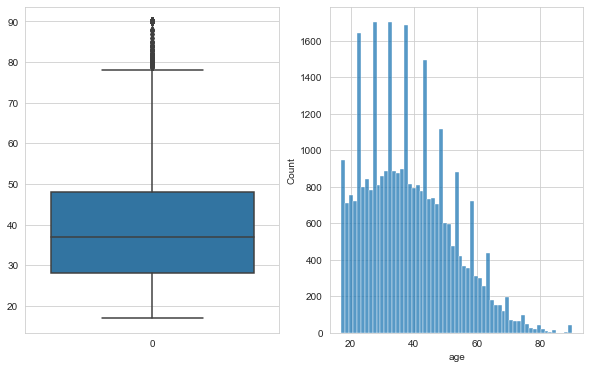

In [40]:
# Her bir değişken için outlierlara bakalım. age'den başlıyoruz.
# Seaborn ile yanyana bir boxplot bir de histplot çizeceğiz.
plt.figure(figsize=(10,6)) # Yer ayır...
plt.subplot(1,2,1)       # 1 satır, 2 sütun olsun. Onlardan birincisi
sns.boxplot(data=df.age)            # sayısal olan değişkenler için genelde seaborn daha uygun.
plt.subplot(1,2,2)      # ikincisi
sns.histplot(data=df.age); # noktalıvirgül ya da show ile yazılmazsa grafik üzerinde yazı çıkar.

In [41]:
"""
Yukarıdaki göresele ilişkin açıklama:
Boxplot'ta alt ve üst çizgiler min ve max noktaları. 
Onların dışına taşanlar outlier'ları gösteriyor.Mesela burada 78'in üstünde outlierlar var.
Yoğunluk 40'a yakın.
Histplot'ta da kuyruk sağa kaymış. Yani yaş arttıkça azalıyor, genç olanlar fazla.
"""

"\nYukarıdaki göresele ilişkin açıklama:\nBoxplot'ta alt ve üst çizgiler min ve max noktaları. \nOnların dışına taşanlar outlier'ları gösteriyor.Mesela burada 78'in üstünde outlierlar var.\nYoğunluk 40'a yakın.\nHistplot'ta da kuyruk sağa kaymış. Yani yaş arttıkça azalıyor, genç olanlar fazla.\n"

In [42]:
# IQR'ı bulacağız. 0.25 ile 0.75'e bakalım (Quantiles). 
low = df.age.quantile(0.25)
low

28.0

In [43]:
high = df.age.quantile(0.75)
high

48.0

In [44]:
iqr = high -low
iqr

20.0

In [45]:
# IQR'ın 1.5 katını ekler ya da çıkarırsak iki yöndeki outlierları bulabiliriz.
lower_lim = low - 1.5*iqr
lower_lim

-2.0

In [46]:
upper_lim = high + 1.5*iqr
upper_lim

78.0

In [47]:
# 78 yaşının üstündekileri bir kontrol edelim
df[df["age"]>78]["age"].value_counts()

90    43
79    22
80    22
81    20
82    12
84    10
83     6
88     3
85     3
86     1
87     1
Name: age, dtype: int64

In [48]:
# Büyükten küçüğe 78 üstü yaş grubuna yani outlierlarımıza, age sütununu baz alarak diğer sütunlarla brilikte bakalım.
# İnceledikten sonra outlierlar hakkında net bir kanaatimiz oluştuktan sonra atabiliriz.
df[df["age"]>78].sort_values(by="age", ascending=False).head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,salary_num
12451,90,Unknown,225063,Some-college,Never-married,Unknown,Unmarried,Asian-Pac-Islander,Male,0,0,10,South,<=50K,0
10545,90,Private,175491,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,9386,0,50,Ecuador,>50K,1
5406,90,Private,51744,Masters,Never-married,Exec-managerial,Unmarried,Black,Male,0,0,50,United-States,>50K,1
19747,90,Private,226968,7th-8th,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K,0
28463,90,Federal-gov,195433,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,30,United-States,<=50K,0


In [49]:
# 78 yaş üstü kaç kişi olduğuna bakmak için
df[df["age"]>78].sort_values(by="age", ascending=False).shape   # 143 kişi

(143, 15)

## hours_per_week

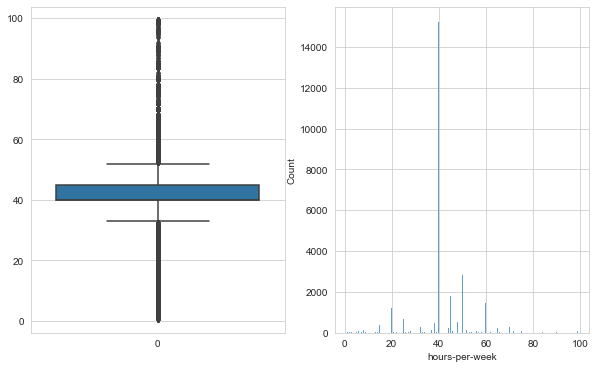

In [50]:
# Yukarıda age için çizdiğimiz grafiğin benzerini "hours_per_week" için çiziyoruz
plt.figure(figsize=(10,6)) 
plt.subplot(1,2,1)      
sns.boxplot(data=df["hours-per-week"])   # değişken içinde "-" işareti olduğu için tırnak ve köşeli parantez.   
plt.subplot(1,2,2)     
sns.histplot(data=df["hours-per-week"]);     # iki yönde de outlierlar görünüyor. 40 saat civarında yığılma var.

In [51]:
# Yukarıda yaptığımız outlier bulma işlemini yapıyoruz.
low = df["hours-per-week"].quantile(0.25)
low

40.0

In [52]:
high = df["hours-per-week"].quantile(0.75)
high

45.0

In [53]:
iqr = high -low
iqr

5.0

In [54]:
# outlierın alt değeri
lower_lim = low - 1.5*iqr
lower_lim

32.5

In [55]:
# outlierın üst değeri
upper_lim = high + 1.5*iqr
upper_lim

52.5

In [56]:
# 52.5 saat üstü çalışanların sayısını görmek için
df[(df["hours-per-week"]>52.5)]["hours-per-week"].value_counts()

60    1475
55     694
70     291
65     244
80     133
56      97
99      85
72      71
75      66
84      45
54      41
90      29
58      28
53      25
62      18
66      17
57      17
64      14
85      13
68      12
98      11
63      10
78       8
77       6
59       5
96       5
67       4
91       3
81       3
76       3
88       2
73       2
89       2
97       2
86       2
61       2
95       2
94       1
87       1
82       1
92       1
74       1
Name: hours-per-week, dtype: int64

In [57]:
# değere göre değil de indexine göre büyükten küçüğe de sıralayabilirdik.
df[(df["hours-per-week"]>52.5)]["hours-per-week"].value_counts().sort_index(ascending=False)

99      85
98      11
97       2
96       5
95       2
94       1
92       1
91       3
90      29
89       2
88       2
87       1
86       2
85      13
84      45
82       1
81       3
80     133
78       8
77       6
76       3
75      66
74       1
73       2
72      71
70     291
68      12
67       4
66      17
65     244
64      14
63      10
62      18
61       2
60    1475
59       5
58      28
57      17
56      97
55     694
54      41
53      25
Name: hours-per-week, dtype: int64

In [58]:
# 99 saat çalışanlara detaylı bakmak istersek.. Mesela random olarak 10 örneği inceleyelim.
df[df["hours-per-week"]==99].sample(10)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,salary_num
18603,33,Self-emp-not-inc,67482,Assoc-voc,Divorced,Other-service,Unmarried,White,Female,0,0,99,United-States,<=50K,0
18881,43,Private,249771,HS-grad,Married-civ-spouse,Transport-moving,Husband,Asian-Pac-Islander,Male,0,0,99,United-States,<=50K,0
8796,39,Private,70995,Bachelors,Married-civ-spouse,Transport-moving,Husband,White,Male,15024,0,99,United-States,>50K,1
32531,30,Unknown,33811,Bachelors,Never-married,Unknown,Unmarried,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K,0
10266,56,Self-emp-inc,184598,9th,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,99,United-States,<=50K,0
19529,38,Private,66326,HS-grad,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,99,United-States,<=50K,0
26858,66,Private,262285,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,99,United-States,<=50K,0
12625,51,Private,160724,Doctorate,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,99,South,<=50K,0
26596,35,Private,297574,Assoc-acdm,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,99,United-States,>50K,1
1172,25,Private,404616,Masters,Married-civ-spouse,Farming-fishing,Unmarried,White,Male,0,0,99,United-States,>50K,1


In [59]:
# 99 saat çalışanlardan yaşı 70'in üzerindekilere bakalım
df[(df["hours-per-week"]==99) & (df.age>70)]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,salary_num
15356,90,Private,90523,HS-grad,Widowed,Transport-moving,Unmarried,White,Male,0,0,99,United-States,<=50K,0
16604,73,Self-emp-not-inc,102510,7th-8th,Married-civ-spouse,Farming-fishing,Husband,White,Male,6418,0,99,United-States,>50K,1
19997,72,Private,268861,7th-8th,Widowed,Other-service,Unmarried,White,Female,0,0,99,Unknown,<=50K,0


In [60]:
# IQR
IQR = 45-40

In [61]:
lower_lim=40-1.5*IQR
lower_lim

32.5

In [62]:
upper_lim= 45+ 1.5*IQR
upper_lim

52.5

In [63]:
df.groupby("workclass")["hours-per-week"].mean()

workclass
Federal-gov        41.38
Local-gov          40.98
Never-worked       28.43
Private            40.27
Self-emp-inc       48.82
Self-emp-not-inc   44.42
State-gov          39.03
Unknown            31.92
Without-pay        32.71
Name: hours-per-week, dtype: float64

In [64]:
df[df["hours-per-week"]== 99].groupby("workclass")["hours-per-week"].count()

workclass
Federal-gov          1
Local-gov            4
Private             44
Self-emp-inc         9
Self-emp-not-inc    21
State-gov            1
Unknown              5
Name: hours-per-week, dtype: int64

## find outlier values which extends the upper limit in both age and hours-per-week columns

In [65]:
df[(df['age']>=78) & (df['hours-per-week']>=53)]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,salary_num
3777,80,Private,87518,Some-college,Never-married,Prof-specialty,Unmarried,White,Male,0,1816,60,United-States,<=50K,0
5370,90,Local-gov,227796,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,20051,0,60,United-States,>50K,1
7481,83,Private,195507,HS-grad,Widowed,Protective-serv,Unmarried,White,Male,0,0,55,United-States,<=50K,0
7720,84,Private,241065,Masters,Never-married,Prof-specialty,Unmarried,White,Male,0,0,66,United-States,<=50K,0
8806,90,Private,87372,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,20051,0,72,United-States,>50K,1
10546,78,Unknown,33186,7th-8th,Married-civ-spouse,Unknown,Husband,White,Male,0,0,60,United-States,<=50K,0
11996,90,Private,40388,Bachelors,Never-married,Exec-managerial,Unmarried,White,Male,0,0,55,United-States,<=50K,0
12830,81,Private,201398,Masters,Widowed,Prof-specialty,Unmarried,White,Male,0,0,60,Unknown,<=50K,0
15356,90,Private,90523,HS-grad,Widowed,Transport-moving,Unmarried,White,Male,0,0,99,United-States,<=50K,0
24395,83,Self-emp-inc,153183,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,2392,55,United-States,>50K,1


In [66]:
df[df["hours-per-week"]>52.5]["hours-per-week"].value_counts().sort_index(ascending=False)
#99 saat alışan 84 kişi

99      85
98      11
97       2
96       5
95       2
94       1
92       1
91       3
90      29
89       2
88       2
87       1
86       2
85      13
84      45
82       1
81       3
80     133
78       8
77       6
76       3
75      66
74       1
73       2
72      71
70     291
68      12
67       4
66      17
65     244
64      14
63      10
62      18
61       2
60    1475
59       5
58      28
57      17
56      97
55     694
54      41
53      25
Name: hours-per-week, dtype: int64

In [67]:
df[df["hours-per-week"]>52.5].sort_values(by="hours-per-week",ascending=False)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,salary_num
25986,44,Local-gov,212665,Some-college,Married-civ-spouse,Protective-serv,Husband,Black,Male,0,0,99,United-States,<=50K,0
23179,31,Private,511289,HS-grad,Never-married,Farming-fishing,Unmarried,White,Male,2907,0,99,United-States,<=50K,0
13558,38,Private,191103,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,99,United-States,>50K,1
9831,67,Private,35015,Masters,Never-married,Prof-specialty,Unmarried,White,Male,0,0,99,United-States,<=50K,0
13580,38,Self-emp-not-inc,112158,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,99,United-States,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,23,Private,181820,HS-grad,Separated,Craft-repair,Unmarried,White,Male,0,0,53,United-States,<=50K,0
28858,62,Private,123411,7th-8th,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,53,United-States,<=50K,0
15889,43,Federal-gov,155106,Bachelors,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,53,United-States,<=50K,0
15908,22,Local-gov,163205,HS-grad,Never-married,Other-service,Unmarried,White,Female,0,0,53,United-States,<=50K,0


## Boxplot and Histplot for all numeric features

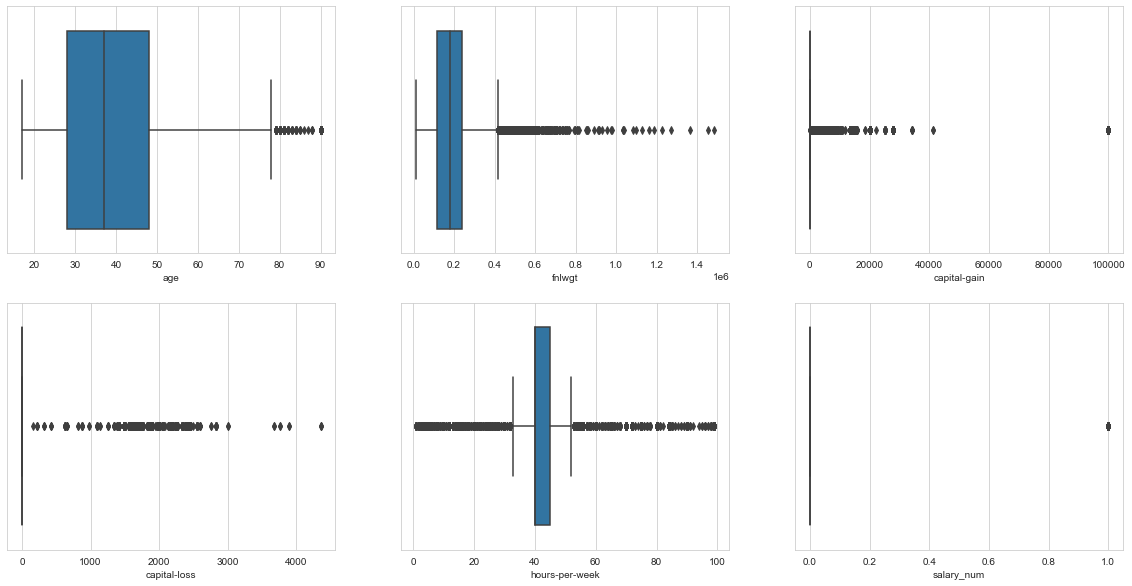

In [68]:
index=0
plt.figure(figsize=(20,10))
for feature in df.select_dtypes('number').columns:
    index+=1
    plt.subplot(2,3,index)
    sns.boxplot(x=feature,data=df,whis=1.5)  #whis IQr*1.5

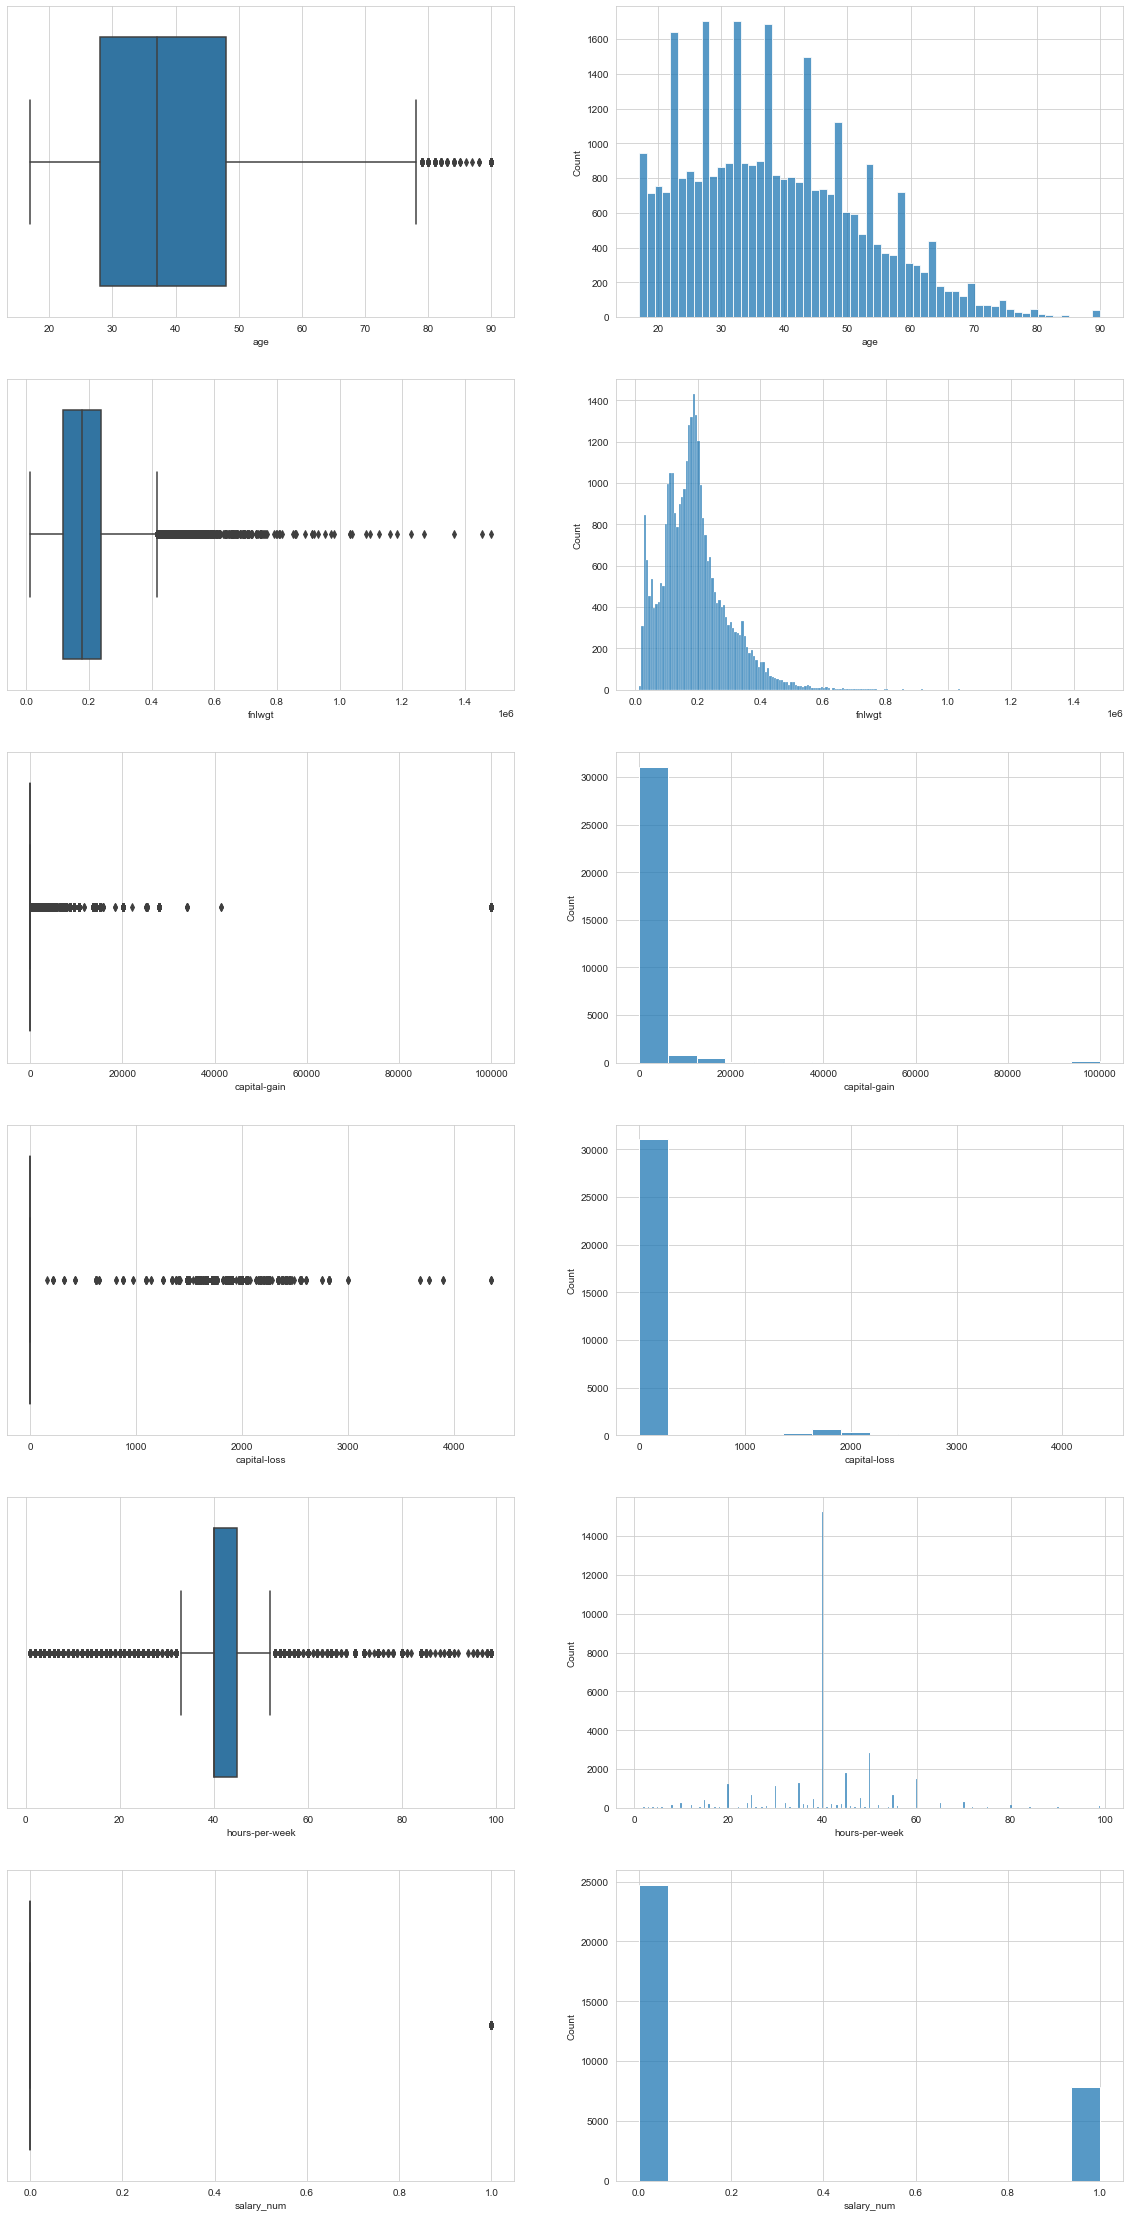

In [69]:
index=0
plt.figure(figsize=(20,40))
for feature in df.select_dtypes('number').columns:
    index+=1
    plt.subplot(6,2,index)
    sns.boxplot(x=feature,data=df,whis=1.5) 
    index+=1
    plt.subplot(6,2,index)
    sns.histplot(x=feature,data=df) 

## After looking at the outliers you can drop the rows which actually does not make any sense. 
** Hint: You can check age and hours per week columns. **
find outlier values which extends the upper limit in both age and hour-per-week columns

In [70]:
drop_index=df[(df['age']>78) & (df['hours-per-week']>52.5)].index
drop_index

Int64Index([3777, 5370, 7481, 7720, 8806, 11996, 12830, 15356, 24395], dtype='int64')

In [71]:
df.drop(index=drop_index, inplace=True)

In [72]:
# check outlier values which extends the upper limit in both age and hours-per-week columns
df[(df['age']>78) & (df['hours-per-week']>=52.5)]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,salary_num


---
## How many of each race are represented in this dataset?
---

In [73]:
race_count = df.race.value_counts()
race_count

White                 27807
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

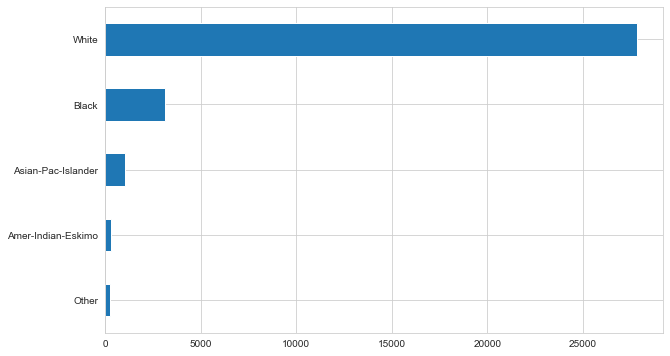

In [74]:
race_count.sort_values().plot.barh();

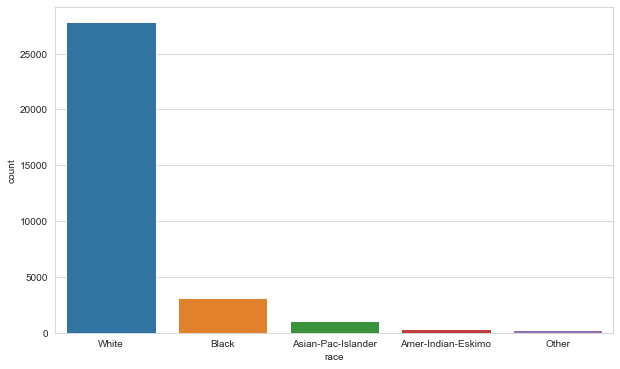

In [75]:
sns.countplot(df.race);

---
## What is the average age of men/women?
---

In [76]:
# sex sütununda Male için ortalama yaşa bakalım
average_age_men = df.loc[df['sex']=='Male','age'].mean()
average_age_men

39.41444378127726

In [77]:
# Femae için ortalama yaşa bakalım.
average_age_men1 = df[df.sex=='Female']['age'].mean()
average_age_men1

36.85823043357163

In [78]:
round(average_age_men,1)

39.4

In [79]:
df.loc[df["sex"] == "Male", "age"].value_counts()

35    630
34    629
37    629
33    620
36    611
31    606
38    591
30    588
41    575
32    573
39    560
28    557
42    552
29    542
43    541
27    541
40    531
25    528
44    522
23    518
45    512
46    509
26    495
47    494
24    493
50    446
51    432
22    423
49    406
21    391
20    390
48    372
19    356
52    344
53    328
54    310
55    282
18    282
57    267
58    261
59    261
56    260
60    233
61    221
17    209
62    170
63    166
64    138
65    121
66    102
67     99
68     78
69     75
70     61
71     46
72     42
73     42
74     32
75     31
76     30
90     25
77     20
79     17
80     16
78     16
81     10
82     10
84      5
83      3
88      2
85      2
87      1
Name: age, dtype: int64

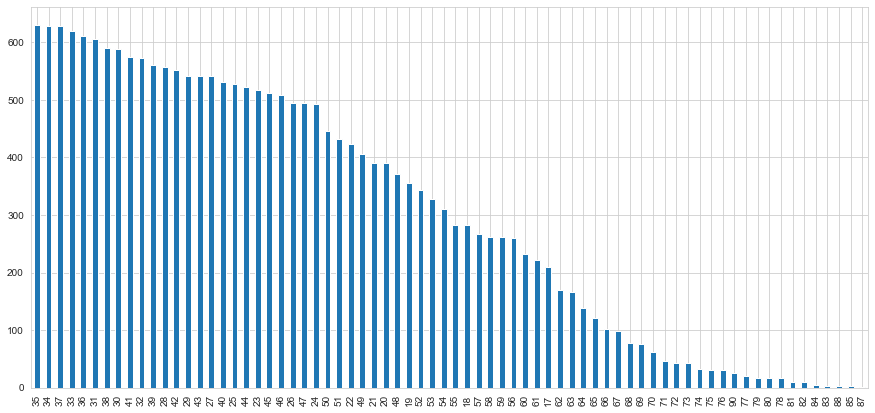

In [80]:
plt.figure(figsize = (15,7))
df.loc[df["sex"] == "Male", "age"].value_counts().plot.bar();

In [81]:
average_age_women = df.loc[df.sex=='Female','age'].mean()
average_age_women 

36.85823043357163

In [82]:
df.loc[df["sex"] == "Female","age"].value_counts()

20    363
23    359
19    356
22    342
21    329
25    313
28    310
24    305
27    294
26    290
36    287
31    282
30    273
29    271
18    268
40    263
34    257
39    256
32    255
33    255
35    246
38    236
41    233
43    229
37    229
42    228
46    228
45    222
47    214
44    202
17    186
48    171
49    171
51    163
50    156
55    137
53    136
52    134
56    106
58    105
54    105
59     94
57     91
62     88
61     79
60     79
64     70
63     64
65     57
67     52
66     48
68     42
69     33
70     28
71     26
72     25
73     22
74     19
76     16
90     14
75     14
81      9
77      9
78      7
79      5
80      5
84      4
82      2
83      1
85      1
88      1
86      1
Name: age, dtype: int64

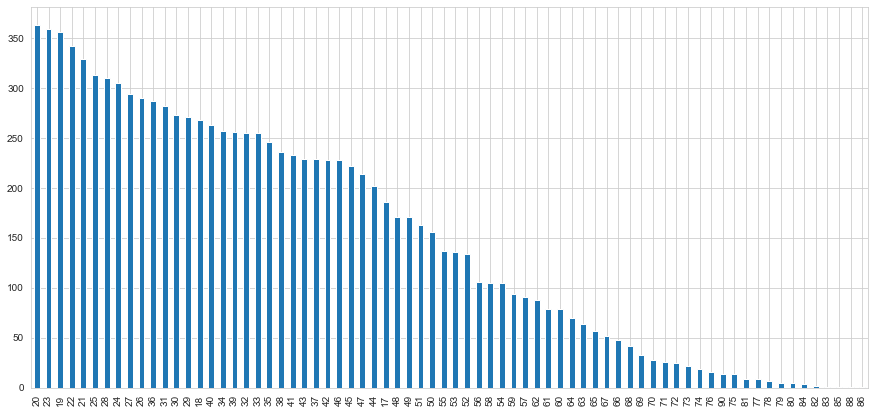

In [83]:
plt.figure(figsize = (15,7))
df.loc[df["sex"] == "Female", "age"].value_counts().plot.bar();

---
## What is the percentage of people who have a Bachelor's degree?
---

In [84]:
df.groupby('education').education.count()

education
10th              933
11th             1175
12th              433
1st-4th           168
5th-6th           333
7th-8th           646
9th               514
Assoc-acdm       1067
Assoc-voc        1382
Bachelors        5353
Doctorate         413
HS-grad         10499
Masters          1720
Preschool          51
Prof-school       575
Some-college     7290
Name: education, dtype: int64

In [85]:
df.education.value_counts()

HS-grad         10499
Some-college     7290
Bachelors        5353
Masters          1720
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       575
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [86]:
df[df["education"]=="Bachelors"]["education"].value_counts()

Bachelors    5353
Name: education, dtype: int64

In [87]:
df.groupby('education').education.count().loc['Bachelors']

5353

In [88]:
df.groupby('education').education.count().sum()
#len(df)

32552

In [89]:
upper = df.groupby('education').education.count().loc['Bachelors']

#lower = df.groupby('education').education.count().sum()

percentage_bachelors = upper / len(df) * 100

percentage_bachelors

16.44445809781273

In [90]:
df["education"].value_counts(normalize=True)

HS-grad        0.32
Some-college   0.22
Bachelors      0.16
Masters        0.05
Assoc-voc      0.04
11th           0.04
Assoc-acdm     0.03
10th           0.03
7th-8th        0.02
Prof-school    0.02
9th            0.02
12th           0.01
Doctorate      0.01
5th-6th        0.01
1st-4th        0.01
Preschool      0.00
Name: education, dtype: float64

In [91]:
percentage_bachelors = df["education"].value_counts(normalize=True).loc["Bachelors"]*100
round(percentage_bachelors,1)

16.4

In [92]:
print(f"The percentage of people who have a Bachelor's degree : %{round(percentage_bachelors,1)}")

The percentage of people who have a Bachelor's degree : %16.4


---
## What percentage of people with advanced education (`Bachelors`, `Masters`, or `Doctorate`) make more than 50K?
---

In [93]:
df.salary.value_counts()

<=50K    24714
>50K      7838
Name: salary, dtype: int64

In [94]:
df.education.value_counts()   #.sum()

HS-grad         10499
Some-college     7290
Bachelors        5353
Masters          1720
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       575
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [95]:
df.education.isin(["Bachelors","Masters","Doctorate"])

0         True
1         True
2        False
3        False
4         True
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Name: education, Length: 32552, dtype: bool

In [96]:
higher_education = (df.education=='Bachelors') | (df.education=='Masters') | (df.education=='Doctorate')
higher_education

0         True
1         True
2        False
3        False
4         True
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Name: education, Length: 32552, dtype: bool

In [97]:
df_high_edu = df[higher_education]
df_high_edu

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,salary_num
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Unmarried,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
5,37,Private,284582,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,0
8,31,Private,45781,Masters,Never-married,Prof-specialty,Unmarried,White,Female,14084,0,50,United-States,>50K,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32538,38,Private,139180,Bachelors,Divorced,Prof-specialty,Unmarried,Black,Female,15020,0,45,United-States,>50K,1
32539,71,Unknown,287372,Doctorate,Married-civ-spouse,Unknown,Husband,White,Male,0,0,10,United-States,>50K,1
32544,31,Private,199655,Masters,Divorced,Other-service,Unmarried,Other,Female,0,0,30,United-States,<=50K,0
32553,32,Private,116138,Masters,Never-married,Tech-support,Unmarried,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K,0


In [98]:
df_high_edu[df_high_edu['salary']=='>50K']

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,salary_num
8,31,Private,45781,Masters,Never-married,Prof-specialty,Unmarried,White,Female,14084,0,50,United-States,>50K,1
9,42,Private,159449,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,1
11,30,State-gov,141297,Bachelors,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K,1
19,43,Self-emp-not-inc,292175,Masters,Divorced,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,>50K,1
20,40,Private,193524,Doctorate,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32533,54,Private,337992,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,50,Japan,>50K,1
32536,34,Private,160216,Bachelors,Never-married,Exec-managerial,Unmarried,White,Female,0,0,55,United-States,>50K,1
32538,38,Private,139180,Bachelors,Divorced,Prof-specialty,Unmarried,Black,Female,15020,0,45,United-States,>50K,1
32539,71,Unknown,287372,Doctorate,Married-civ-spouse,Unknown,Husband,White,Male,0,0,10,United-States,>50K,1


In [99]:
df[(df.education.isin(["Bachelors","Masters","Doctorate"]))&(df.salary==">50K")]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,salary_num
8,31,Private,45781,Masters,Never-married,Prof-specialty,Unmarried,White,Female,14084,0,50,United-States,>50K,1
9,42,Private,159449,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,1
11,30,State-gov,141297,Bachelors,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K,1
19,43,Self-emp-not-inc,292175,Masters,Divorced,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,>50K,1
20,40,Private,193524,Doctorate,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32533,54,Private,337992,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,50,Japan,>50K,1
32536,34,Private,160216,Bachelors,Never-married,Exec-managerial,Unmarried,White,Female,0,0,55,United-States,>50K,1
32538,38,Private,139180,Bachelors,Divorced,Prof-specialty,Unmarried,Black,Female,15020,0,45,United-States,>50K,1
32539,71,Unknown,287372,Doctorate,Married-civ-spouse,Unknown,Husband,White,Male,0,0,10,United-States,>50K,1


In [100]:
count = df_high_edu[df_high_edu['salary']=='>50K'].education.count()
count

3484

In [101]:
#alternatif
shape= df_high_edu[df_high_edu['salary']=='>50K'].shape[0]
shape

3484

In [102]:
perc_high_edu = count/ len(df_high_edu)   

In [103]:
perc_high_edu

0.4654020838899279

In [104]:
print(f"Percentage of people with advanced education make more than 50K : % {round(perc_high_edu * 100, 2)}")

Percentage of people with advanced education make more than 50K : % 46.54


## What percentage of people without advanced education make more than 50K?

In [105]:
df[(~df.education.isin(["Bachelors","Masters","Doctorate"]))&(df.salary==">50K")] 

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,salary_num
7,52,Self-emp-not-inc,209642,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,1
10,37,Private,280464,Some-college,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K,1
14,40,Private,121772,Assoc-voc,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,Unknown,>50K,1
27,54,Unknown,180211,Some-college,Married-civ-spouse,Unknown,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K,1
38,31,Private,84154,Some-college,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,Unknown,>50K,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32518,57,Local-gov,110417,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,40,United-States,>50K,1
32519,46,Private,364548,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,48,United-States,>50K,1
32545,39,Local-gov,111499,Assoc-acdm,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K,1
32557,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1


In [106]:
lower_education = ~higher_education

In [107]:
df_low_edu = df[lower_education]
df_low_edu

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,salary_num
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Unmarried,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
6,49,Private,160187,9th,Married-spouse-absent,Other-service,Unmarried,Black,Female,0,0,16,Jamaica,<=50K,0
7,52,Self-emp-not-inc,209642,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,1
10,37,Private,280464,Some-college,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0
32557,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1
32558,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0
32559,22,Private,201490,HS-grad,Never-married,Adm-clerical,Unmarried,White,Male,0,0,20,United-States,<=50K,0


In [108]:
df_low_edu[df_low_edu.salary=='>50K']

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,salary_num
7,52,Self-emp-not-inc,209642,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,1
10,37,Private,280464,Some-college,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K,1
14,40,Private,121772,Assoc-voc,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,Unknown,>50K,1
27,54,Unknown,180211,Some-college,Married-civ-spouse,Unknown,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K,1
38,31,Private,84154,Some-college,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,Unknown,>50K,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32518,57,Local-gov,110417,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,40,United-States,>50K,1
32519,46,Private,364548,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,48,United-States,>50K,1
32545,39,Local-gov,111499,Assoc-acdm,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K,1
32557,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1


In [109]:
perc_low_edu = len(df_low_edu[df_low_edu.salary=='>50K'])/len(df_low_edu)

In [110]:
print(f"Percentage of people without advanced education make more than 50K :% {round(perc_low_edu * 100 ,2)}")

Percentage of people without advanced education make more than 50K :% 17.37


In [111]:
if perc_high_edu > perc_low_edu :
    print("More education more money!")
else:
    print("Education has no clear effet on salary. You should investigate some other features also.")

More education more money!


## What percentage of the people who work the minimum number of hours per week have a salary of >50K?

In [112]:
df['hours-per-week'].value_counts()

40    15217
50     2819
45     1824
60     1472
35     1297
20     1224
30     1149
55      691
25      674
48      517
38      476
15      404
70      291
10      278
32      266
24      252
65      244
36      220
42      219
44      212
16      205
12      173
43      151
37      149
8       145
52      138
80      133
56       97
28       86
99       84
46       82
18       75
72       70
75       66
6        64
5        60
4        54
47       49
84       45
22       44
54       41
33       39
3        39
39       38
41       36
14       34
2        32
27       30
26       30
17       29
49       29
90       29
34       28
58       28
7        26
53       25
21       24
13       23
23       21
1        20
62       18
9        18
57       17
66       16
19       14
64       14
51       13
85       13
68       12
98       11
11       11
63       10
78        8
29        7
77        6
31        5
59        5
96        5
67        4
76        3
81        3
91        3
61        2
86  

In [113]:
lazy_riches = (df['hours-per-week']==df['hours-per-week'].min()) & (df.salary=='>50K')
lazy_riches

0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Length: 32552, dtype: bool

In [114]:
df[lazy_riches]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,salary_num
189,58,State-gov,109567,Doctorate,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,1,United-States,>50K,1
20072,65,Unknown,76043,HS-grad,Married-civ-spouse,Unknown,Husband,White,Male,0,0,1,United-States,>50K,1


In [115]:
num_lazy_riches = df[lazy_riches].shape[0]
num_lazy_riches

2

In [116]:
num_min_workers = len(df[df['hours-per-week']==df['hours-per-week'].min()])
num_min_workers

20

In [117]:
df[df['hours-per-week']==df['hours-per-week'].min()]['hours-per-week'].value_counts()

1    20
Name: hours-per-week, dtype: int64

In [118]:
print (f"Percentage of the people who work the minimum number of hours per week have a salary of >50K : % {round(num_lazy_riches/num_min_workers*100)}")

Percentage of the people who work the minimum number of hours per week have a salary of >50K : % 10


 ## What country has the highest percentage of people that earn >50K

In [119]:
country_salary_df = df.groupby('native-country')[['salary']].count()
country_salary_df

,salary
native-country,
Cambodia,19
Canada,121
China,75
Columbia,59
Cuba,95
Dominican-Republic,70
Ecuador,28
El-Salvador,106
England,90


In [120]:
country_salary_df_riches = df[df.salary=='>50K'].groupby('native-country')[['salary']].count()
country_salary_df_riches

,salary
native-country,
Cambodia,7
Canada,39
China,20
Columbia,2
Cuba,25
Dominican-Republic,2
Ecuador,4
El-Salvador,9
England,30


In [121]:
country_salary_df.loc['Iran'][0]

43

In [122]:
country_salary_df_riches.loc['Iran'][0]

18

In [123]:
country_salary_df_riches.loc['Iran'][0]/country_salary_df.loc['Iran'][0]

0.4186046511627907

In [124]:
rich_per_country = (country_salary_df_riches/country_salary_df).sort_values('salary',ascending=True)
rich_per_country

,salary
native-country,
Dominican-Republic,0.03
Columbia,0.03
Guatemala,0.05
Mexico,0.05
Nicaragua,0.06
Peru,0.06
Vietnam,0.07
Honduras,0.08
El-Salvador,0.08


In [125]:
rich_per_country[rich_per_country.salary==rich_per_country.salary.max()]

,salary
native-country,
Iran,0.42


In [126]:
#use iloc here
rich_per_country.sort_values('salary',ascending=False).iloc[[0]]

,salary
native-country,
Iran,0.42


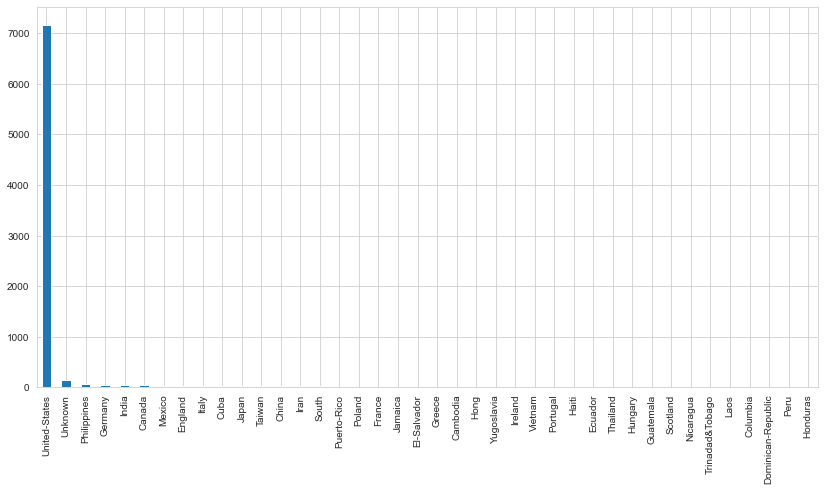

In [127]:
plt.figure(figsize=(14,7))
df.loc[df["salary"] == ">50K", "native-country"].value_counts().plot(kind="bar");

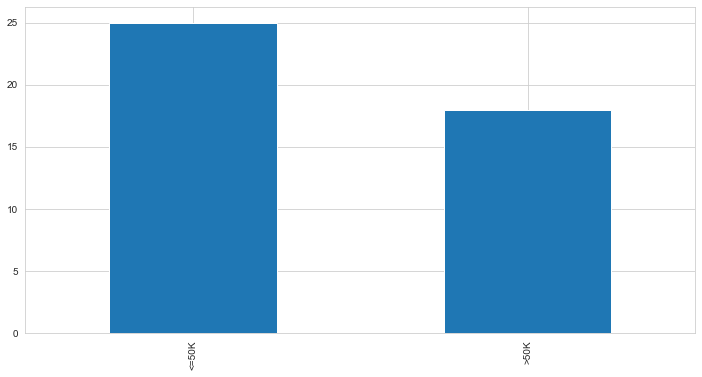

In [128]:
plt.figure(figsize=(12,6))
df.loc[((df["native-country"] == "Iran")), "salary"].value_counts().plot.bar();

## Identify the most popular occupation for those who earn >50K in India.

In [129]:
top_IN_occupation = (df['native-country']=='India') & (df.salary=='>50K')

top_IN_occupation

0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Length: 32552, dtype: bool

In [130]:
df[top_IN_occupation]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,salary_num
11,30,State-gov,141297,Bachelors,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K,1
968,48,Private,164966,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K,1
1327,52,Private,168381,HS-grad,Widowed,Other-service,Unmarried,Asian-Pac-Islander,Female,0,0,40,India,>50K,1
7258,42,State-gov,102343,Prof-school,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,72,India,>50K,1
7285,54,State-gov,93449,Masters,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K,1
8124,36,Private,172104,Prof-school,Never-married,Prof-specialty,Unmarried,Other,Male,0,0,40,India,>50K,1
9939,43,Federal-gov,325706,Prof-school,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,50,India,>50K,1
10590,35,Private,98283,Prof-school,Never-married,Prof-specialty,Unmarried,Asian-Pac-Islander,Male,0,0,40,India,>50K,1
10661,59,Private,122283,Prof-school,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,99999,0,40,India,>50K,1
10736,30,Private,243190,Prof-school,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,20,India,>50K,1


In [131]:
df[top_IN_occupation]['occupation'].value_counts()

Prof-specialty      25
Exec-managerial      8
Other-service        2
Tech-support         2
Transport-moving     1
Sales                1
Adm-clerical         1
Name: occupation, dtype: int64

In [132]:
df[top_IN_occupation]['occupation'].value_counts().index[0]

'Prof-specialty'

In [133]:
df[top_IN_occupation]['occupation'].value_counts()[0]

25

In [134]:
 #use mode here
a =  df[top_IN_occupation]["occupation"].mode()[0]
a

'Prof-specialty'

In [135]:
print(f"{a} the most popular occupation for those who earn >50K in India.")

Prof-specialty the most popular occupation for those who earn >50K in India.


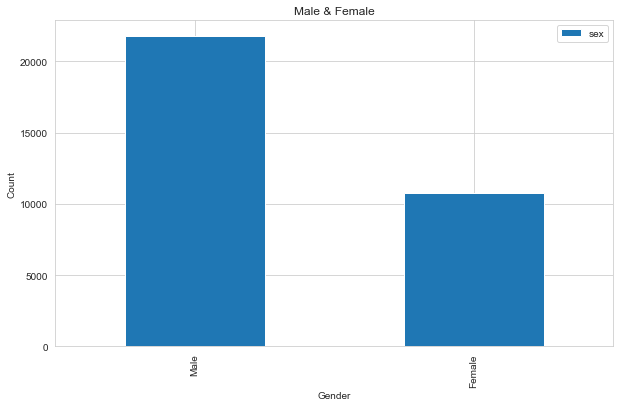

In [136]:
df["sex"].value_counts().plot(kind="bar");
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Male & Female")
plt.legend();

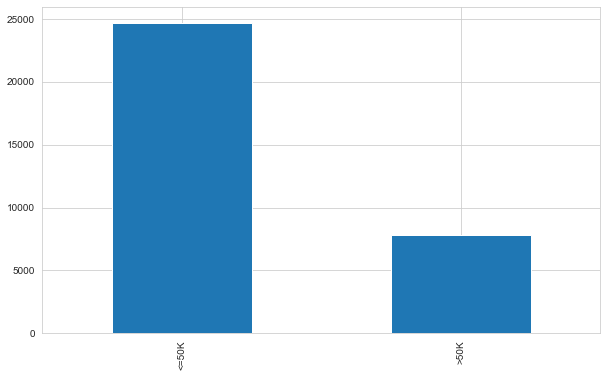

In [137]:
df["salary"].value_counts().plot(kind="bar")
plt.show()

In [138]:
pie1 = df.race.value_counts()
pie1_list = [float(each) for each in df.race.value_counts()]
pie1_list

[27807.0, 3124.0, 1039.0, 311.0, 271.0]

In [139]:
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected = True)
import plotly.graph_objs as go
import plotly.express as px 

labels = df.race.unique()
# figure
fig = {
    "data" : [
        {
            "values" : pie1_list,
            "labels" : labels,
            "domain" : {"x": [0, 0.5]},
            "name" : "Number Of Race",
            "hoverinfo" : "label + percent",
            "hole" : .2,
            "type" : "pie",
            "pull" : [0,0,0,0,0, 0.2,0.2]    # exploded
        },
    ],
    "layout" : {
        "title" : "Race Rates",
        "annotations" : [
            {"font" : {"size" : 10},
             "text" : "Number of race ",
             "x" : 0.3,
             "y" : 0.9
            },
        
        ],
   
    }
}
iplot(fig)

In [140]:
df.race.unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

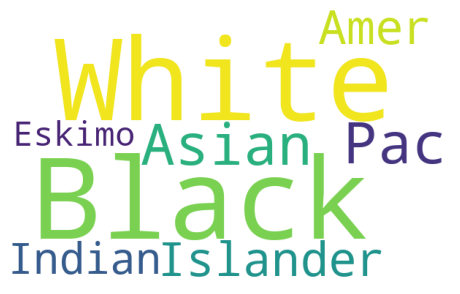

In [147]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
 
RACE = df.race.unique()

plt.subplots(figsize = (8, 8))
wordcloud = WordCloud(
                        background_color= "white",
                        width = 612,
                        height= 384).generate(" ".join(RACE))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("graph.png") # save graph in your computer

plt.show()

In [142]:
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected = True)
import plotly.graph_objs as go
import plotly.express as px 

labels = df.race.unique()
# figure
fig = {
    "data" : [
        {
            "values" : pie1_list,
            "labels" : labels,
            "domain" : {"x": [0, 0.5]},
            "name" : "Number Of Race",
            "hoverinfo" : "label + percent",
            "hole" : .2,
            "type" : "pie",
            "pull" : [0,0,0,0,0, 0.2,0.2]    # exploded
        },
    ],
    "layout" : {
        "title" : "Race Rates",
        "annotations" : [
            {"font" : {"size" : 10},
             "text" : "Number of race ",
             "x" : 0.3,
             "y" : 0.9
            },
        
        ],
   
    }
}
iplot(fig)